### Para instalação

---

In [1]:
!pip install qiskit==1.4.1
!pip install qiskit-aer
!pip install qiskit-ibm-runtime
!pip install qiskit-ibm-provider
!pip install pylatexenc
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 36.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 103.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 47.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 366.2/366.2 kB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.8/75.8 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.8/64.8 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 11.2 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.3
    Uninstalling requests-2.32.3:
      Successfully

In [2]:
# !pip show qiskit-ibm-provider
# !pip install qiskit-terra
# !pip uninstall qiskit_ibm_runtime qiskit_ibm_provider
# !pip install qiskit==1.4.1
!pip list | grep qiskit

qiskit                                1.4.1
qiskit-aer                            0.17.1
qiskit-ibm-provider                   0.11.0
qiskit-ibm-runtime                    0.41.0


### Funções e Subprogramas

---

In [3]:
# from mod_gate_colours import gate_colours
gate_colours = {
    "displaycolor": {
        "x": [ # gate name
            "#271080", # box color (darkblue)
            "#FFFFFF" # box text color (white)
        ],
        "id": [ # gate name
            "#666666", # box color (gray)
            "#FFFFFF" # box text color (white)
        ],
        "h": [ # gate name
            "#165e69", # box color ()
            "#FFFFFF" # box text color (white)
        ],
        "mcz": [ # gate name
            "#005edb", # box color (lightblue)
            "#ffffff" # box text color (white)
        ],
        "z": [ # gate name
            "#02afc9", # box color ()
            "#FFFFFF" # box text color (white)
        ],
    },
}

In [4]:
def inicializa_s(qc, qubits):
    for qubit in qubits:
        qc.h(qubit)
    return qc

def mcz_circ(qc):
    qc.h(3)
    qc.mcx([0, 1, 2],3)
    qc.h(3)
    return qc

def oraculo_Uw(qc, qubits, winner, QuantumCircuit):
    for i, index in enumerate(winner):
        if index == "0":
            qc.x(i)

    mcz_gate = mcz_circ(qc = QuantumCircuit(4,name="mcz")).to_instruction() # Para agrupar as portas em uma unica
    qc.append(mcz_gate,[i for i in range(4)])

    for i, index in enumerate(winner):
        if index == "0":
            qc.x(i)


def difusor_Us(qc, qubits):
    for i in qubits:
        qc.h(i)
        qc.x(i)

    mcz_gate = mcz_circ(qc = QuantumCircuit(4,name="mcz")).to_instruction() # Para agrupar as portas em uma unica
    qc.append(mcz_gate,[i for i in range(4)])

    for i in qubits:
        qc.x(i)
        qc.h(i)
    return qc

In [5]:
def sort_dict_by_binary_keys(input_dict):
    return dict(sorted(input_dict.items(), key=lambda item: int(item[0], 2)))

def reverse_qubits(input_dict):
    reversed_dict = {}
    for key, value in input_dict.items():
        reversed_key = ''.join(reversed(key))
        reversed_dict[reversed_key] = value
    return reversed_dict


In [6]:
def plota_hist_comparativo(dicionarios, num_shots, backend_name, optm_lvl, legendas=None):
    """
    dicionarios: lista de dicionários {chave: valor}
    legendas: lista de strings para legenda, como ["Sem DD", "Com DD"]
    """
    backend_name = " ".join(backend_name.split("_")).title()

    cores = ['#215ae3', '#4d99ff', '#17626e', '#2dcd7b']  # expandir se quiser mais

    chaves = list(dicionarios[0].keys())
    x = np.arange(len(chaves))
    width = .22
    fig, ax = plt.subplots(figsize=(10, 9))

    chaves_media = chaves.copy()
    chaves_media.remove("1111")

    total = 0

    for dic in dicionarios:
        for i in range(len(chaves_media)):
            total += dic[chaves_media[i]]


    media = total/(len(chaves_media)*len(dicionarios))
    porcent_media = media * 100 / num_shots

    for i, dic in enumerate(dicionarios):
        valores = list(dic.values())
        deslocamento = (i - len(dicionarios)/3)*width
        label = legendas[i] if legendas and i < len(legendas) else f'Dataset {i+1}'
        ax.bar(x + deslocamento, valores, width=width, label=label, color=cores[i % len(cores)])

        for j, (chave, valor) in enumerate(dic.items()):
            if chave == "1111":
                porcent = round(valor * 100 / num_shots,1)
                ax.text(x[j] + deslocamento, valor + 3, f"{porcent}%", ha='center', va='bottom', rotation=60, fontsize=9)

    ax.set_title(f'Histograma de {backend_name} (OptimLvl: {optm_lvl})', fontsize=16)
    ax.set_xlabel('Resultados', fontsize=13)
    ax.set_ylabel('Contagens', fontsize=14)
    ax.set_xlim(-.7, len(chaves) - .2)
    ax.set_xticks(x)
    ax.set_xticklabels(chaves, rotation=0, ha='center')

    # Linha horizontal indicando a média
    ax.axhline(y=media, color='#7e5ee6', linestyle='--', linewidth=1.5, label=f'Média ({int(media)} contagens, {int(porcent_media)}%)')
    ax.legend()
    ax.text(0.013, 0.84, "Obs.: O traçado é uma média valores de cada coluna,\ncom exceção do estado marcado $|{1111}\\rangle$.",
            transform=ax.transAxes, fontsize=10, va='top',
            bbox=dict(boxstyle="round,pad=0.3", fc="#ebf2ff", ec="black", lw=1))

    plt.tight_layout()
    plt.show()

#### Outras funcoes de plot

In [7]:
def plota_hist(chaves, valores, num_shots, backend_name, i):
    backend_name = " ".join(backend_name.split("_")).title()

    fig, ax = plt.subplots(figsize=(10, 6))
    plt.bar(chaves, valores, width=.5)#, ax=ax)  # Passa o eixo (axis) diretamente para plot_histogram

    # Adicionar título e rótulos manualmente usando matplotlib
    ax.set_title(f'Histograma de {backend_name} (OptimLvl: {i})', fontsize= 16) # Para usar quando sem supressao
    # ax.set_title(f'Histograma de {backend_name} (OptimLvl: {i} + DD)', fontsize= 16) # Para usar quando tiver supressao
    ax.set_xlabel('Resultados', loc='center', fontsize= 13)
    ax.set_ylabel('Contagens', fontsize= 14)
    ax.set_xticklabels(chaves, rotation=60, ha='center')  # Adjust rotation angle and alignment
    for i, valor in enumerate(valores):
        ax.text(i, valor + 1, str(round(valor*(100/num_shots),2)) + ' %', ha='center', va='bottom', fontsize=10)

    # Mostrar o gráfico
    plt.show()

In [8]:
def plota_hist_multiplos(dados, num_shots, backend_name):
    """
    dados: lista de dicionários, cada um com 'chaves', 'valores', e 'opt_level'
    Exemplo:
        dados = [
            {"chaves": [...], "valores": [...], "opt_level": 0},
            {"chaves": [...], "valores": [...], "opt_level": 1},
        ]
    """
    backend_name = " ".join(backend_name.split("_")).title()
    num_plots = len(dados)
    cols = 2
    rows = (num_plots + 1) // cols

    fig, axs = plt.subplots(rows, cols, figsize=(12, 5 * rows))
    axs = axs.flatten() if num_plots > 1 else [axs]

    for idx, dado in enumerate(dados):
        ax = axs[idx]
        chaves = dado['chaves']
        valores = dado['valores']
        i = dado['opt_level']

        ax.bar(chaves, valores, width=.5)
        ax.set_title(f'Histograma de {backend_name} (OptimLvl: {i})', fontsize=16)
        ax.set_xlabel('Resultados', fontsize=13)
        ax.set_ylabel('Contagens', fontsize=14)
        ax.set_xticklabels(chaves, rotation=60, ha='center')
        for j, valor in enumerate(valores):
            ax.text(j, valor + 1, str(round(valor * (100 / num_shots), 2)) + ' %',
                    ha='center', va='bottom', fontsize=10)

    # Remove subplots vazios (caso num_plots seja ímpar)
    for idx in range(num_plots, len(axs)):
        fig.delaxes(axs[idx])

    plt.tight_layout()
    plt.show()


###Construção do Circuito Quântico

---



In [9]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

from numpy import pi, sqrt, floor
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt
import pylatexenc



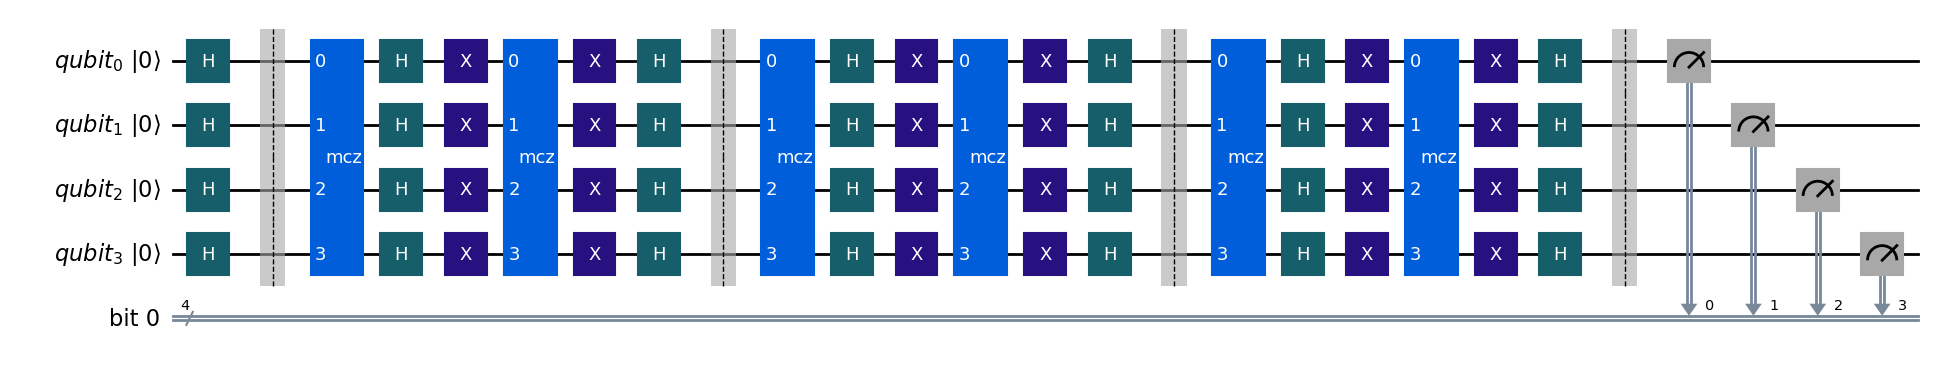

In [10]:
n = 4 # numero de qubits
qubits = QuantumRegister(n, 'qubit')
bits= ClassicalRegister(n, 'bit')

N = 2**n
k = (round((pi/4)*sqrt(N)))

marked_state = "1111"

QC_Grover = QuantumCircuit(qubits, bits)

inicializa_s(QC_Grover, range(n))

for _ in range(k):
    QC_Grover.barrier([i for i in range(n)])
    oraculo_Uw(QC_Grover, range(n), marked_state, QuantumCircuit)
    difusor_Us(QC_Grover, (range(n)))

QC_Grover.barrier([i for i in range(n)])

QC_Grover_for_statevector = QC_Grover.copy()

QC_Grover.measure([i for i in range(n)],[i for i in range(n)])

QC_Grover.draw(
    output='mpl',
    justify="left",
    fold=-1,
    initial_state=True,
    reverse_bits=False,
    style=gate_colours
    )

###Conectar ao server da IBM

---

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService

In [ ]:
# Or save your credentials on disk.
QiskitRuntimeService.save_account(
    token="lagOcAdh7n6Ryg9LBHP9gAMUhpnQGyyjyx1v3Nii6xBY",
    instance="crn:v1:bluemix:public:quantum-computing:us-east:a/52b80a1c43624d9ca2558ce3878f0636:6ca35ba6-d47b-47fc-a7a7-b05ecd076c7b::",
    channel="ibm_quantum_platform",
    overwrite=True,
    set_as_default=True
)
service = QiskitRuntimeService()


### Distribuição Ideal

---

In [11]:
from qiskit.quantum_info import Statevector

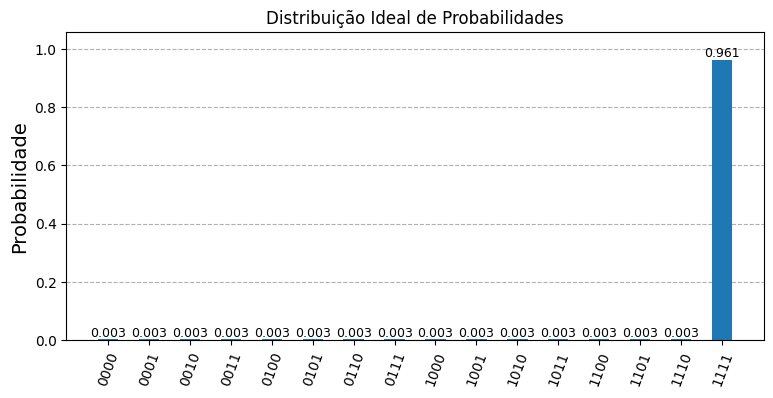

In [65]:
ideal_distribution = Statevector.from_instruction(QC_Grover_for_statevector).probabilities_dict()


fig, ax = plt.subplots()
fig.set_figwidth(9)
fig.set_figheight(4)
plot_histogram(ideal_distribution, title="Distribuição Ideal de Probabilidades", ax=ax, bar_labels=False)
for i, (key, value) in enumerate(ideal_distribution.items()):
    ax.text(i, value + 0.01, f"{value:.3f}", ha='center', fontsize=9)
ax.set_yticks(np.arange(0, 1.1, .2))
ax.set_ylabel("Probabilidade")
plt.show()

### Simulação Aer

---

Simulações com o AerSimulator usam ruídos que imitam um computador quântico real com as calibrações mais recentes.

In [ ]:
from qiskit_aer import AerSimulator
from qiskit.compiler import transpile

circuits = []

In [ ]:
service = QiskitRuntimeService()

backend = service.backend('ibm_brisbane')

# generate a simulator that mimics the real quantum

backend_sim = AerSimulator.from_backend(backend)
transpiled_circ_sim = transpile(QC_Grover, backend_sim)
result = backend_sim.run(transpiled_circ_sim, shots=20000).result()
circuits.append(transpiled_circ_sim)

<ipython-input-26-658dafbc119e>:1: DeprecationWarning: The "ibm_quantum" channel option is deprecated and will be sunset on 1 July. After this date, "ibm_cloud" and "local" will be the only valid channels. For information on migrating to the new IBM Quantum Platform on the "ibm_cloud" channel, review the migration guide https://quantum.cloud.ibm.com/docs/migration-guides/classic-iqp-to-cloud-iqp .
  service = QiskitRuntimeService()


In [ ]:
backend = service.backend('ibm_torino')

# generate a simulator that mimics the real quantum

backend_sim = AerSimulator.from_backend(backend)
transpiled_circ_sim = transpile(QC_Grover, backend_sim)
circuits.append(transpiled_circ_sim)

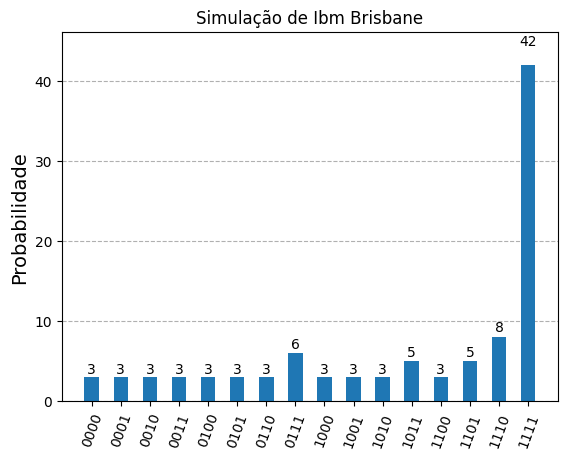

In [ ]:
counts = result.get_counts()
for key, value in counts.items():
    counts[key] = round((value/200)) # quando coloca casas decimais nao esta arredondando
# print(counts)
fig, ax = plt.subplots()
plot_histogram(counts, title="Simulação de Ibm Brisbane", ax=ax)
ax.set_ylabel("Probabilidade")
plt.show()

### Execução Backend Real

#### Usando Transpile:

In [ ]:
from qiskit.compiler import transpile
print(service.backends())

[<IBMBackend('ibm_brisbane')>, <IBMBackend('ibm_torino')>]


In [ ]:
# TRANSPILACAO SEM GERENCIADOR

backend_name = "ibm_torino"
backend_HW = service.backend(backend_name)

transpiled_2 = transpile(QC_Grover, backend_HW, optimization_level=2)
transpiled_3 = transpile(QC_Grover, backend_HW, optimization_level=3)

In [ ]:
print(transpiled_2.size())
print(transpiled_3.size())


534
534


#### Criar um Gerenciador de Passes:

In [ ]:
from qiskit.transpiler import generate_preset_pass_manager
print(service.backends())

[<IBMBackend('ibm_brisbane')>, <IBMBackend('ibm_torino')>]


In [ ]:
backend_name = "ibm_torino"
backend_HW = service.backend(backend_name)

pass_manager_2 = generate_preset_pass_manager(
    optimization_level=2, backend=backend_HW
)
pass_manager_3 = generate_preset_pass_manager(
    optimization_level=3, backend=backend_HW
)

In [ ]:
transpiled_pm_2 = pass_manager_2.run(QC_Grover)
transpiled_pm_3 = pass_manager_3.run(QC_Grover)

print(transpiled_pm_2.size())
print(transpiled_pm_3.size())

903
870


#### Rodando

In [ ]:
from qiskit_ibm_runtime import SamplerV2 as Sampler, Batch
from qiskit.providers.jobstatus import JobStatus

import time
# from qiskit_ibm_runtime import QiskitRuntimeService

In [ ]:
def aguardar_jobs(jobs):
    while True:
        todos_finalizados = True
        for job in jobs:
            status = job.status()
            print(f"Job {job.job_id()}: {status}")
            if status not in ["DONE", "CANCELLED", "ERROR"]:
                todos_finalizados = False
        if todos_finalizados:
            break
        time.sleep(30)  # Espera 30 seg

def rodar():
    num_shots = 20000
    todos_jobs = []

    with Batch(backend=backend_HW):
        sampler = Sampler()

        # -------- Bloco 1: jobs sem mitigação
        # job_none_2 = sampler.run([transpiled_2], shots=num_shots)
        # job_none_3 = sampler.run([transpiled_3], shots=num_shots)
        # todos_jobs.extend([job_none_2, job_none_3])
        # print("Aguardando bloco 1 (sem mitigação)...")
        # aguardar_jobs(todos_jobs)

        # -------- Bloco 2: Dynamical Decoupling
        # sampler.options.dynamical_decoupling.enable = True
        # job_DD_2 = sampler.run([transpiled_2], shots=num_shots)
        # job_DD_3 = sampler.run([transpiled_3], shots=num_shots)
        # todos_jobs = [job_DD_2, job_DD_3]
        # print("Aguardando bloco 2 (Dynamical Decoupling)...")
        # aguardar_jobs(todos_jobs)
        # sampler.options.dynamical_decoupling.enable = False

        # -------- Bloco 3: Pauli Twirling
        # sampler.options.twirling.enable_gates = True
        # job_Twiling_2 = sampler.run([transpiled_2], shots=num_shots)
        # job_Twiling_3 = sampler.run([transpiled_3], shots=num_shots)
        # todos_jobs = [job_Twiling_2, job_Twiling_3]
        # print("Aguardando bloco 3 (Twirling)...")
        # aguardar_jobs(todos_jobs)

        # -------- Bloco 4: DD + Twirling
        sampler.options.dynamical_decoupling.enable = True
        sampler.options.twirling.enable_gates = True
        job_DD_Twiling_2 = sampler.run([transpiled_2], shots=num_shots)
        job_DD_Twiling_3 = sampler.run([transpiled_3], shots=num_shots)
        todos_jobs = [job_DD_Twiling_2, job_DD_Twiling_3]
        print("Aguardando bloco 4 (DD + Twirling)...")
        aguardar_jobs(todos_jobs)

        all_jobs = [job_none_2, job_none_3, job_DD_2, job_DD_3, job_Twiling_2, job_Twiling_3, job_DD_Twiling_2, job_DD_Twiling_3]

        print(todos_jobs)
        # Exibir IDs de todos os jobs
        print("\nTodos os jobs enviados:")
        for job in all_jobs:
            print(f"Job ID: {job.job_id()}")

try:
    rodar()
except Exception as e:
    print(f"Erro: {e}")


Aguardando bloco 4 (DD + Twirling)...
Job d296rqm682lc73d5m2t0: QUEUED
Job d296rqrp64qc73ei60a0: QUEUED
Job d296rqm682lc73d5m2t0: QUEUED
Job d296rqrp64qc73ei60a0: QUEUED
Job d296rqm682lc73d5m2t0: QUEUED
Job d296rqrp64qc73ei60a0: QUEUED
Job d296rqm682lc73d5m2t0: QUEUED
Job d296rqrp64qc73ei60a0: QUEUED
Job d296rqm682lc73d5m2t0: QUEUED
Job d296rqrp64qc73ei60a0: QUEUED
Job d296rqm682lc73d5m2t0: QUEUED
Job d296rqrp64qc73ei60a0: QUEUED
Job d296rqm682lc73d5m2t0: QUEUED
Job d296rqrp64qc73ei60a0: QUEUED
Job d296rqm682lc73d5m2t0: QUEUED
Job d296rqrp64qc73ei60a0: QUEUED
Job d296rqm682lc73d5m2t0: QUEUED
Job d296rqrp64qc73ei60a0: QUEUED
Job d296rqm682lc73d5m2t0: QUEUED
Job d296rqrp64qc73ei60a0: QUEUED
Job d296rqm682lc73d5m2t0: QUEUED
Job d296rqrp64qc73ei60a0: QUEUED
Job d296rqm682lc73d5m2t0: QUEUED
Job d296rqrp64qc73ei60a0: QUEUED
Job d296rqm682lc73d5m2t0: QUEUED
Job d296rqrp64qc73ei60a0: QUEUED
Job d296rqm682lc73d5m2t0: QUEUED
Job d296rqrp64qc73ei60a0: QUEUED
Job d296rqm682lc73d5m2t0: QUEUED
Job d

Job d296rqm682lc73d5m2t0: RUNNING
Job d296rqrp64qc73ei60a0: RUNNING
Job d296rqm682lc73d5m2t0: RUNNING
Job d296rqrp64qc73ei60a0: RUNNING
Job d296rqm682lc73d5m2t0: RUNNING
Job d296rqrp64qc73ei60a0: RUNNING
Job d296rqm682lc73d5m2t0: RUNNING
Job d296rqrp64qc73ei60a0: RUNNING
Job d296rqm682lc73d5m2t0: RUNNING
Job d296rqrp64qc73ei60a0: RUNNING
Job d296rqm682lc73d5m2t0: RUNNING
Job d296rqrp64qc73ei60a0: RUNNING
Job d296rqm682lc73d5m2t0: RUNNING
Job d296rqrp64qc73ei60a0: RUNNING
Job d296rqm682lc73d5m2t0: RUNNING
Job d296rqrp64qc73ei60a0: RUNNING
Job d296rqm682lc73d5m2t0: RUNNING
Job d296rqrp64qc73ei60a0: RUNNING
Job d296rqm682lc73d5m2t0: RUNNING
Job d296rqrp64qc73ei60a0: RUNNING
Job d296rqm682lc73d5m2t0: RUNNING
Job d296rqrp64qc73ei60a0: RUNNING
Job d296rqm682lc73d5m2t0: RUNNING
Job d296rqrp64qc73ei60a0: RUNNING
Job d296rqm682lc73d5m2t0: RUNNING
Job d296rqrp64qc73ei60a0: RUNNING
Job d296rqm682lc73d5m2t0: RUNNING
Job d296rqrp64qc73ei60a0: RUNNING
Job d296rqm682lc73d5m2t0: RUNNING
Job d296rqrp64

### Recuperar resutados por ID.

In [ ]:
job_none_2 = service.job('d294sq056fsc73e7iv3g')
job_none_3 = service.job('d294sq3octts738kt1g0')
job_DD_2 = service.job('d295m76af9ts739lbpb0')
job_DD_3 = service.job('d295m73ac8as73alj6r0')
job_Twiling_2 = service.job('d295tpjac8as73aljdtg')
job_Twiling_3 = service.job('d295tpmaf9ts739lc0e0')
job_DD_Twiling_2 = service.job('d296rqm682lc73d5m2t0')
job_DD_Twiling_3 = service.job('d296rqrp64qc73ei60a0')

In [ ]:
result_none = []
result_none_2 = job_none_2.result()
result_none_3 = job_none_3.result()
result_none.append(result_none_2)
result_none.append(result_none_3)

status_none_2 = job_none_2.status()
status_none_3 = job_none_3.status()
status_DD_2 = job_DD_2.status()
status_DD_3 = job_DD_3.status()
status_Twirling_2 =  job_Twiling_2.status()
status_Twirling_3 =  job_Twiling_3.status()
status_DD_Twirling_2 =  job_DD_Twiling_2.status()
status_DD_Twirling_3 =  job_DD_Twiling_3.status()

num_shots = 20000
backend_name = "ibm_brisbane"

In [ ]:
status_none_2 = job_none_2.status()
print(f"Status none 2: {job_none_2.status()}")
# print()
status_none_3 = job_none_3.status()
print(f"Status none 3: {job_none_3.status()}")
print()

status_DD_2 = job_DD_2.status()
print(f"Status DD 2: {job_DD_2.status()}")
# print()
status_DD_3 = job_DD_3.status()
print(f"Status DD 3: {job_DD_3.status()}")
print()

status_Twirling_2 = job_Twiling_2.status()
print(f"Status Twirling 2: {job_Twiling_2.status()}")
# print()
status_Twirling_3 = job_Twiling_3.status()
print(f"Status Twirling 3: {job_Twiling_3.status()}")
print()

status_DD_Twirling_2 = job_DD_Twiling_2.status()
print(f"Status Twirling 2: {job_DD_Twiling_2.status()}")
# print()
status_DD_Twirling_3 = job_Twiling_3.status()
print(f"Status DD + Twirling 3: {job_DD_Twiling_3.status()}")
print()

status_none = status_none_2  and status_none_3 in ["DONE", "CANCELLED", "ERROR"]
status_DD = status_DD_2  and status_DD_3 in ["DONE", "CANCELLED", "ERROR"]
status_Twirling = status_Twirling_2  and status_Twirling_3 in ["DONE", "CANCELLED", "ERROR"]
status_DD_Twirling = status_DD_Twirling_2  and status_DD_Twirling_3 in ["DONE", "CANCELLED", "ERROR"]

status_all = status_none and status_DD and status_Twirling and status_DD_Twirling

# Verificar se o job foi concluído ou falhou
if status_all:
    print(f"Todos os jobs concluídos com: {status_none_2=}, {status_none_3=}, {status_DD_2=}, {status_DD_3=}, {status_Twirling_2=}, {status_Twirling_3=}, {status_DD_Twirling_2=}, {status_DD_Twirling_3=} ")
    print("")


Status none 2: DONE
Status none 3: DONE

Status DD 2: DONE
Status DD 3: DONE

Status Twirling 2: DONE
Status Twirling 3: DONE

Status Twirling 2: DONE
Status DD + Twirling 3: DONE

Todos os jobs concluídos com: status_none_2='DONE', status_none_3='DONE', status_DD_2='DONE', status_DD_3='DONE', status_Twirling_2='DONE', status_Twirling_3='DONE', status_DD_Twirling_2='DONE', status_DD_Twirling_3='DONE' 



In [ ]:
# Recuperar e exibir os resultados quando o job terminar
status_none = "DONE" if status_none_2  == "DONE" and status_none_3 == "DONE" else f"{status_none_2}"
result_none = []
if status_none == "DONE":
    result_none_2 = job_none_2.result()
    result_none_3 = job_none_3.result()
    result_none.append(result_none_2)
    result_none.append(result_none_3)
    print(f"Resultado 0: {result_none}")
else:
    print(f"O job 0 terminou com o status: {status_none}")

status_DD = "DONE" if status_DD_2  == "DONE" and status_DD_3 == "DONE" else f"{status_DD_2}"
result_DD = []

if status_DD == "DONE":
    result_DD_2 = job_DD_2.result()
    result_DD_3 = job_DD_3.result()
    result_DD.append(result_DD_2)
    result_DD.append(result_DD_3)
    print(f"Resultado 1: {result_DD}")
else:
    print(f"O job 1 terminou com o status: {status_DD}")

status_Twirling = "DONE" if status_Twirling_2  == "DONE" and status_Twirling_3 == "DONE" else f"{status_Twirling_2}"
result_Twirling = []
if status_Twirling == "DONE":
    result_Twirling_2 = job_Twiling_2.result()
    result_Twirling_3 = job_Twiling_3.result()
    result_Twirling.append(result_Twirling_2)
    result_Twirling.append(result_Twirling_3)
    print(f"Resultado 2: {result_Twirling}")
else:
    print(f"O job 2 terminou com o status: {status_Twirling}")

status_DD_Twirling = "DONE" if status_DD_Twirling_2  == "DONE" and status_DD_Twirling_3 == "DONE" else f"{status_DD_Twirling_2}"
result_DD_Twirling = []
if status_DD_Twirling == "DONE":
    result_DD_Twirling_2 = job_DD_Twiling_2.result()
    result_DD_Twirling_3 = job_DD_Twiling_3.result()
    result_DD_Twirling.append(result_DD_Twirling_2)
    result_DD_Twirling.append(result_DD_Twirling_3)
    print(f"Resultado 3: {result_DD_Twirling}")
else:
    print(f"O job 3 terminou com o status: {status_DD_Twirling}")

Resultado 0: [PrimitiveResult([SamplerPubResult(data=DataBin(bit=BitArray(<shape=(), num_shots=20000, num_bits=4>)), metadata={'circuit_metadata': {}})], metadata={'execution': {'execution_spans': ExecutionSpans([DoubleSliceSpan(<start='2025-08-05 19:00:38', stop='2025-08-05 19:00:45', size=20000>)])}, 'version': 2}), PrimitiveResult([SamplerPubResult(data=DataBin(bit=BitArray(<shape=(), num_shots=20000, num_bits=4>)), metadata={'circuit_metadata': {}})], metadata={'execution': {'execution_spans': ExecutionSpans([DoubleSliceSpan(<start='2025-08-05 19:00:45', stop='2025-08-05 19:00:51', size=20000>)])}, 'version': 2})]
Resultado 1: [PrimitiveResult([SamplerPubResult(data=DataBin(bit=BitArray(<shape=(), num_shots=20000, num_bits=4>)), metadata={'circuit_metadata': {}})], metadata={'execution': {'execution_spans': ExecutionSpans([DoubleSliceSpan(<start='2025-08-05 19:37:39', stop='2025-08-05 19:37:47', size=20000>)])}, 'version': 2}), PrimitiveResult([SamplerPubResult(data=DataBin(bit=Bit

In [ ]:
result_DD_Twirling[1][0].data.bit.get_counts()

{'0000': 576,
 '1111': 8973,
 '1110': 1021,
 '0011': 715,
 '1011': 1048,
 '1101': 965,
 '1001': 576,
 '0111': 1043,
 '0010': 643,
 '0100': 566,
 '0001': 552,
 '1010': 707,
 '1100': 594,
 '0110': 773,
 '1000': 608,
 '0101': 640}

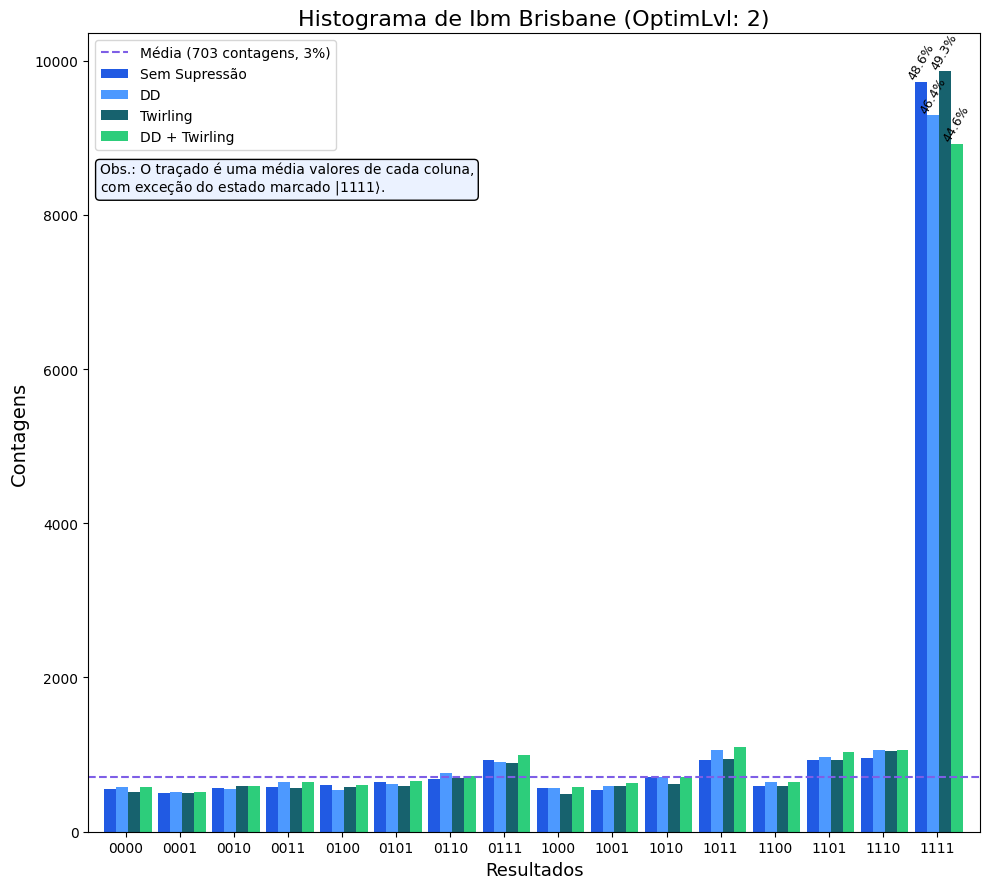

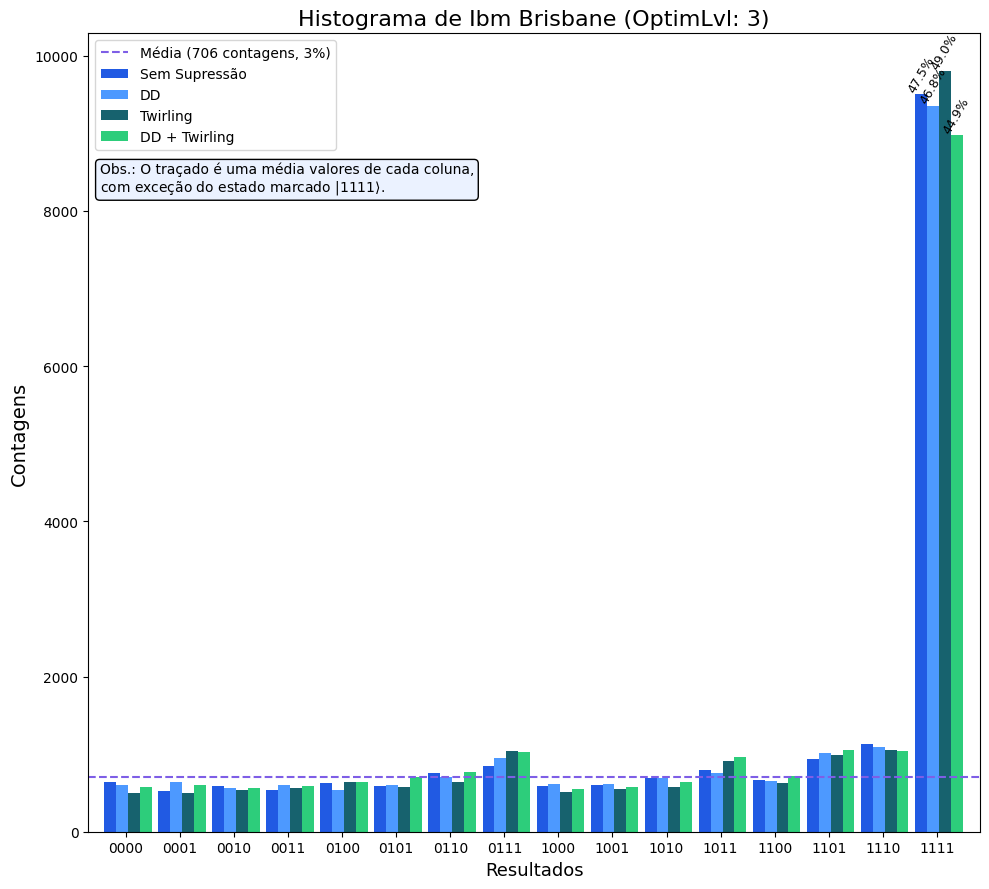

In [ ]:
pub_result_none_2 = result_none[0][0].data.bit.get_counts()
pub_result_none_3 = result_none[1][0].data.bit.get_counts()

pub_result_DD_2 = result_DD[0][0].data.bit.get_counts()
pub_result_DD_3 = result_DD[1][0].data.bit.get_counts()

pub_result_Twirling_2 = result_Twirling[0][0].data.bit.get_counts()
pub_result_Twirling_3 = result_Twirling[1][0].data.bit.get_counts()

pub_result_DD_Twirling_2 = result_DD_Twirling[0][0].data.bit.get_counts()
pub_result_DD_Twirling_3 = result_DD_Twirling[1][0].data.bit.get_counts()
#
# You can use circuit.cregs to find the name of the classical registers.

reversed_pub_result_none_2 = reverse_qubits(pub_result_none_2)
sorted_pub_result_none_2 = sort_dict_by_binary_keys(reversed_pub_result_none_2)
reversed_pub_result_none_3 = reverse_qubits(pub_result_none_3)
sorted_pub_result_none_3 = sort_dict_by_binary_keys(reversed_pub_result_none_3)

reversed_pub_result_DD_2 = reverse_qubits(pub_result_DD_2)
sorted_pub_result_DD_2 = sort_dict_by_binary_keys(reversed_pub_result_DD_2)
reversed_pub_result_DD_3 = reverse_qubits(pub_result_DD_3)
sorted_pub_result_DD_3 = sort_dict_by_binary_keys(reversed_pub_result_DD_3)

reversed_pub_result_Twirling_2 = reverse_qubits(pub_result_Twirling_2)
sorted_pub_result_Twirling_2 = sort_dict_by_binary_keys(reversed_pub_result_Twirling_2)
reversed_pub_result_Twirling_3 = reverse_qubits(pub_result_Twirling_3)
sorted_pub_result_Twirling_3 = sort_dict_by_binary_keys(reversed_pub_result_Twirling_3)

reversed_pub_result_DD_Twirling_2 = reverse_qubits(pub_result_DD_Twirling_2)
sorted_pub_result_DD_Twirling_2 = sort_dict_by_binary_keys(reversed_pub_result_DD_Twirling_2)
reversed_pub_result_DD_Twirling_3 = reverse_qubits(pub_result_DD_Twirling_3)
sorted_pub_result_DD_Twirling_3 = sort_dict_by_binary_keys(reversed_pub_result_DD_Twirling_3)

list_results_2 = []
list_results_2.append(sorted_pub_result_none_2)
list_results_2.append(sorted_pub_result_DD_2)
list_results_2.append(sorted_pub_result_Twirling_2)
list_results_2.append(sorted_pub_result_DD_Twirling_2)

list_results_3 = []
list_results_3.append(sorted_pub_result_none_3)
list_results_3.append(sorted_pub_result_DD_3)
list_results_3.append(sorted_pub_result_Twirling_3)
list_results_3.append(sorted_pub_result_DD_Twirling_3)

list_results = []
list_results.append(list_results_2)
list_results.append(list_results_3)

optm_lvl = [2, 3]

for i, results in enumerate(list_results):
    legendas = ["Sem Supressão", "DD", "Twirling", "DD + Twirling"]
    plota_hist_comparativo(results, num_shots, backend_name, optm_lvl[i], legendas)
    # print(results)

## **Resultados (Depois da atualizacao)**

### **Brisbane**

#### **Com Transpile**

```
job_none_2 = service.job('d294n4pogaas73cudla0')
job_none_3 = service.job('d294n4p29u8s73f9sas0')
job_DD_2 = service.job('d294ncpogaas73cudlig')
job_DD_3 = service.job('d294ncroctts738ksscg')
job_Twiling_2 = service.job('d294nkhogaas73cudlqg')
job_Twiling_3 = service.job('d294nkhogaas73cudlrg')
job_DD_Twiling_2 = service.job('d294ns856fsc73e7iqfg')
job_DD_Twiling_3 = service.job('d294nsh29u8s73f9sbj0')
```

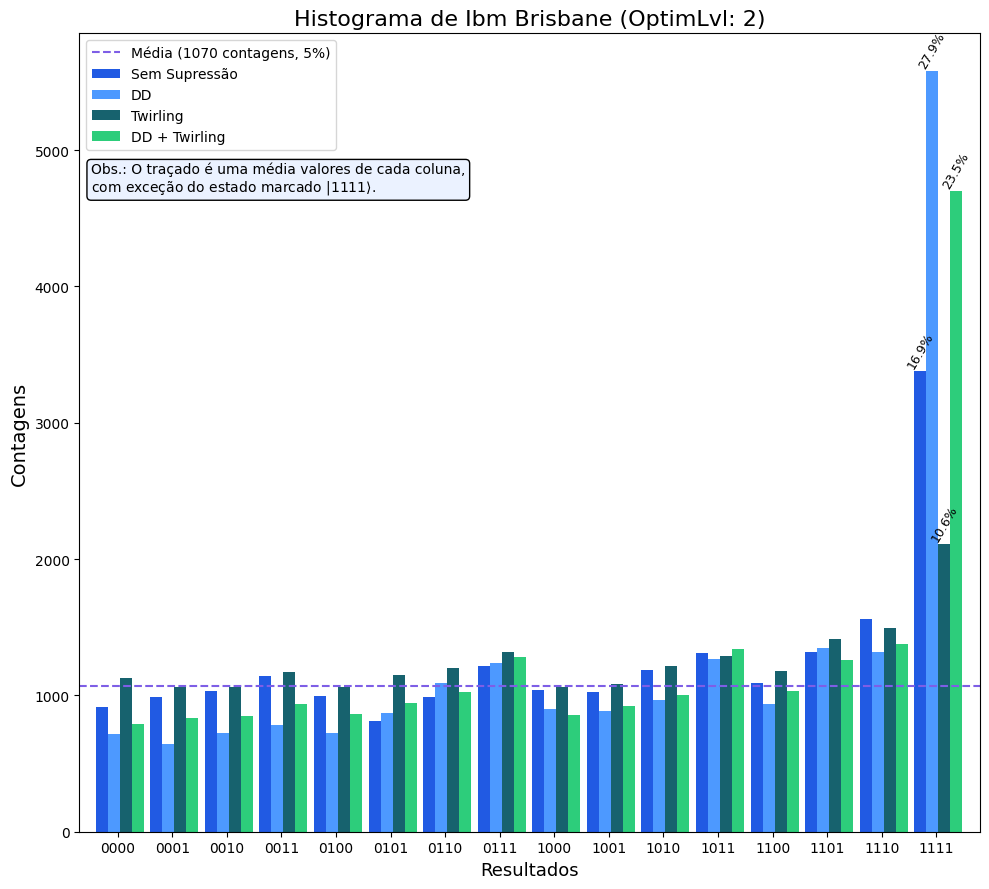

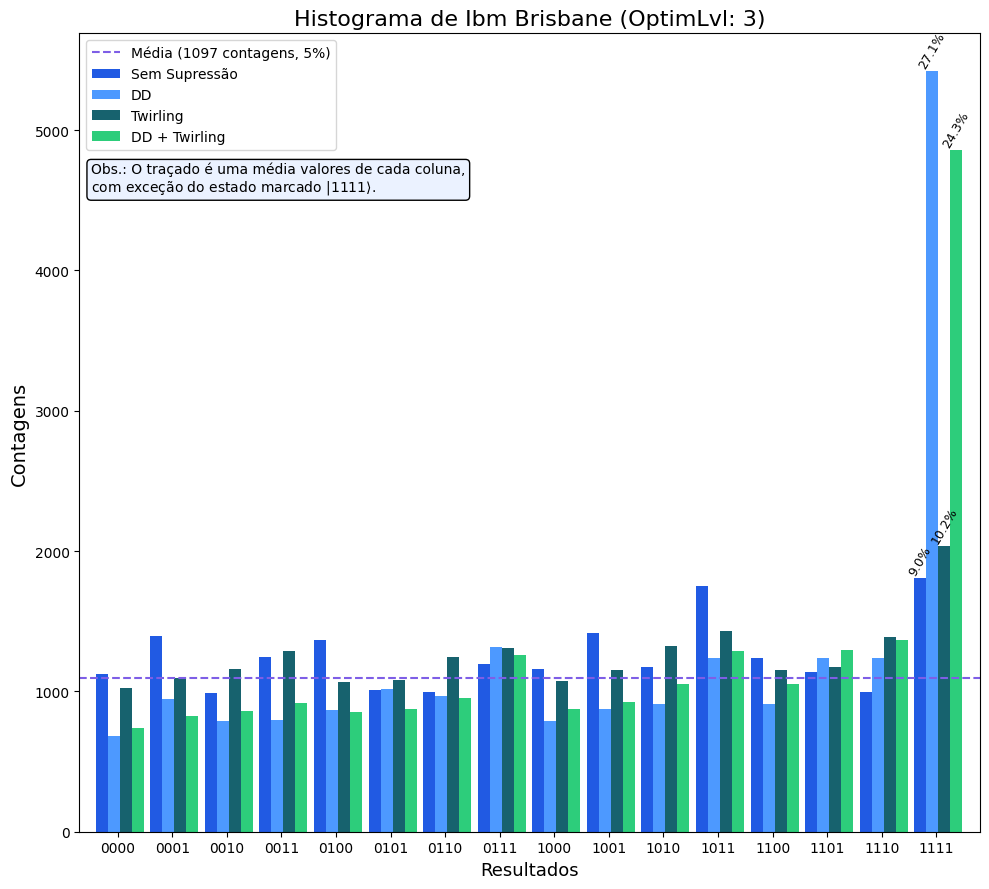

#### **Com Pass Manager**

### **Torino**

#### **Com Transpile**

```
job_none_2 = service.job('d294sq056fsc73e7iv3g')
job_none_3 = service.job('d294sq3octts738kt1g0')
job_DD_2 = service.job('d295m76af9ts739lbpb0')
job_DD_3 = service.job('d295m73ac8as73alj6r0')
job_Twiling_2 = service.job('d295tpjac8as73aljdtg')
job_Twiling_3 = service.job('d295tpmaf9ts739lc0e0')
job_DD_Twiling_2 = service.job('d296rqm682lc73d5m2t0')
job_DD_Twiling_3 = service.job('d296rqrp64qc73ei60a0')
```

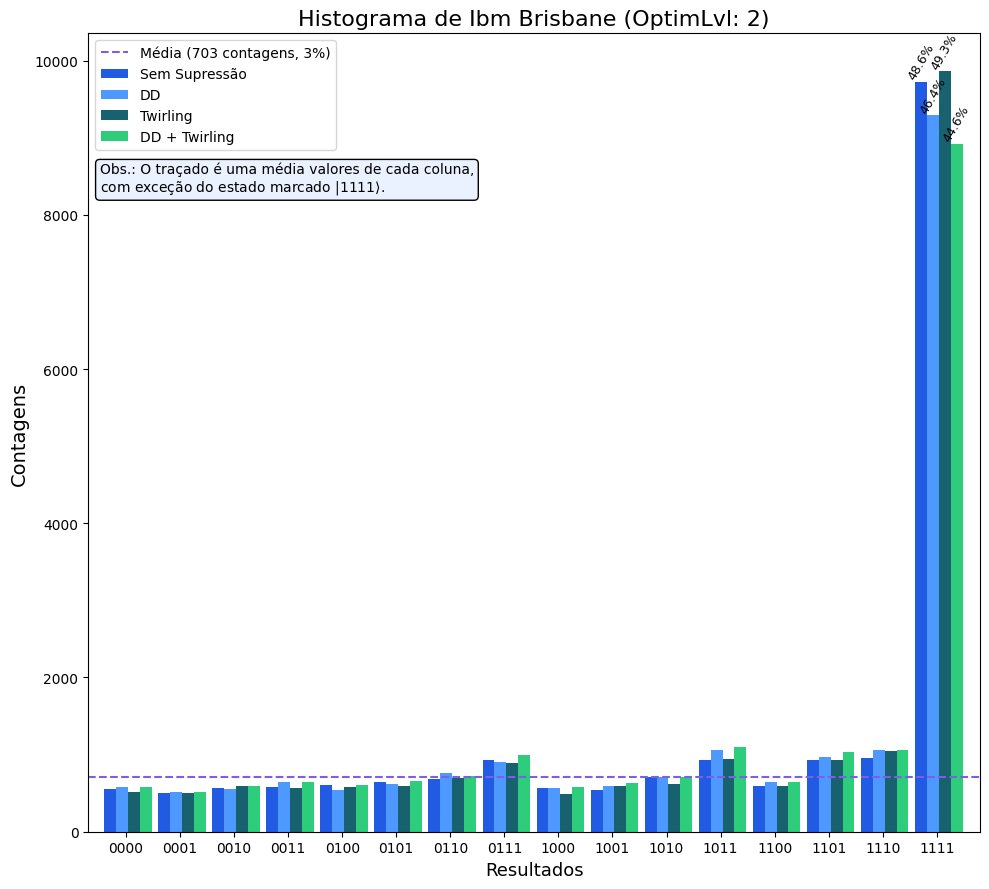

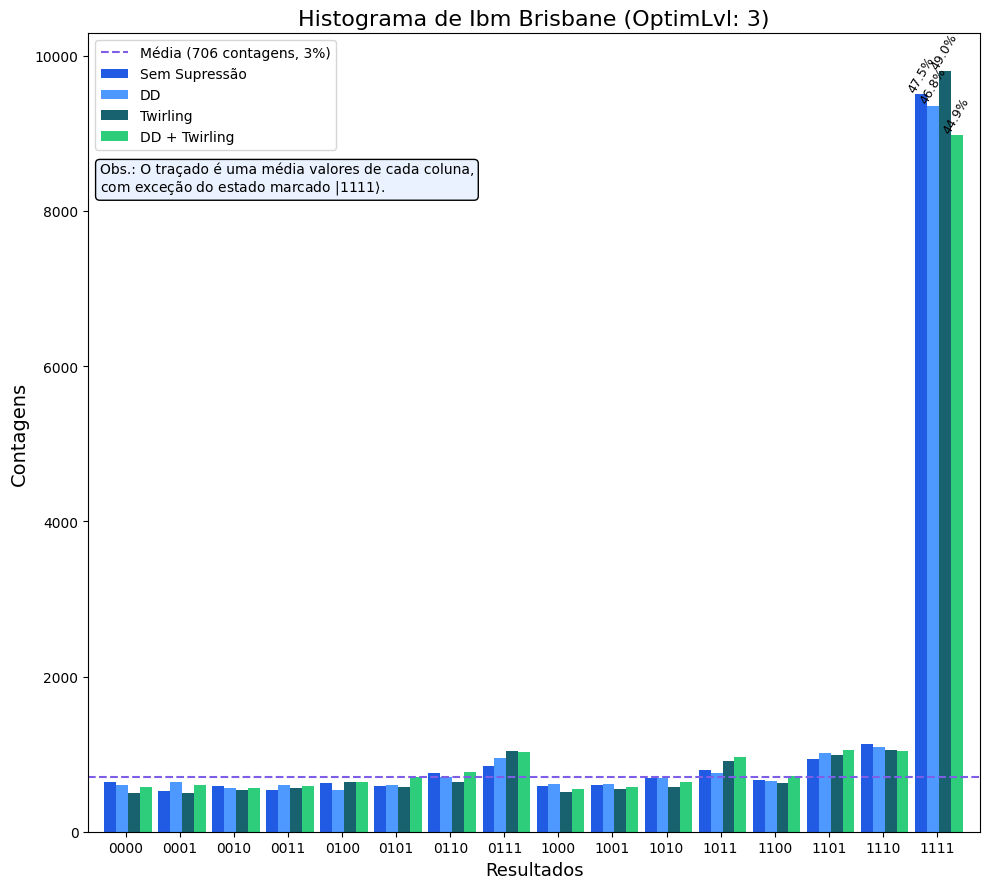

#### **Com Pass Manager**

## **Resultados (Antes da atualizacao)**

### **Resultados Sherbrooke**

#### **Resultados ID de Sherbrooke com DD e Twi (01/05/25) Usando Transpile**

```
job_DD_Twiling_3 = service.job('d09q8tbnhqag008pdxe0')
job_DD_Twiling_2 = service.job('d09q8qtnhqag008pdxcg')
job_Twiling_3 = service.job('d09q8ktrxz8g008a3hhg')
job_Twiling_2 = service.job('d09q8hjqnmvg0086ztdg')
job_DD_3 = service.job('d09q8g2nhqag008pdxb0')
job_DD_2 = service.job('d09q7sfrxz8g008a3hd0')
job_none_3 = service.job('d09q7rfnhqag008pdx80')
job_none_2 = service.job('d09q7qp6rr3g00875px0')
```



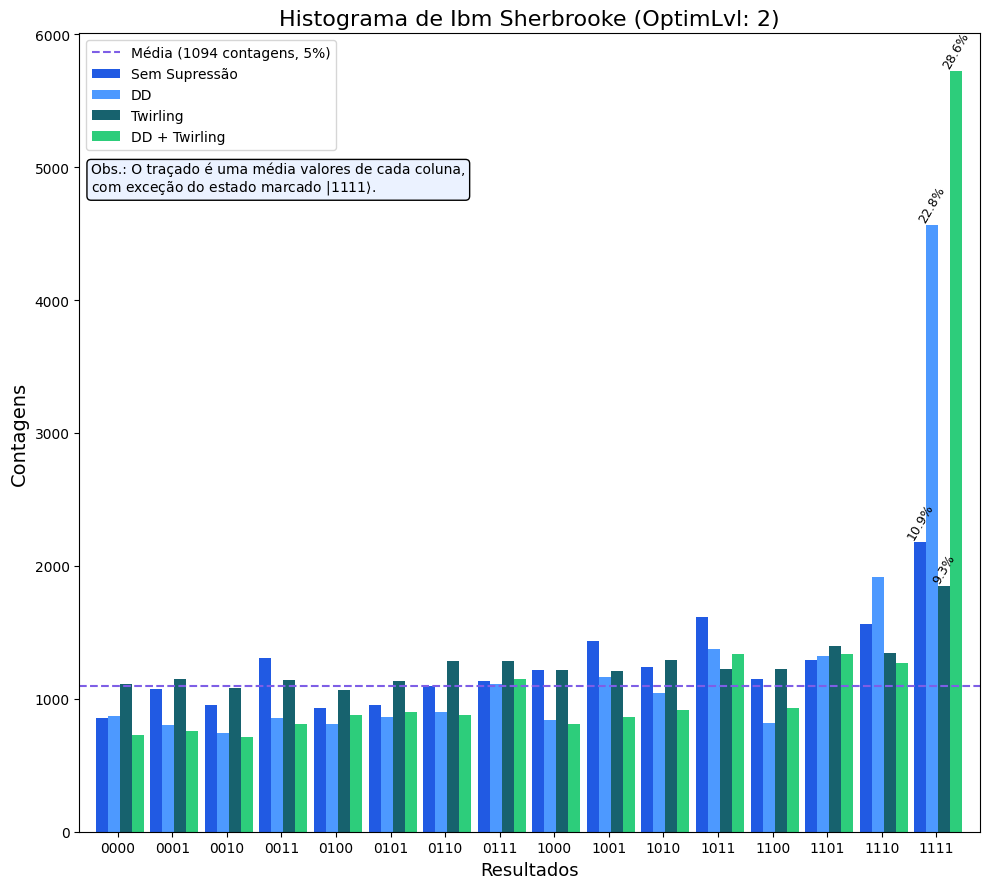

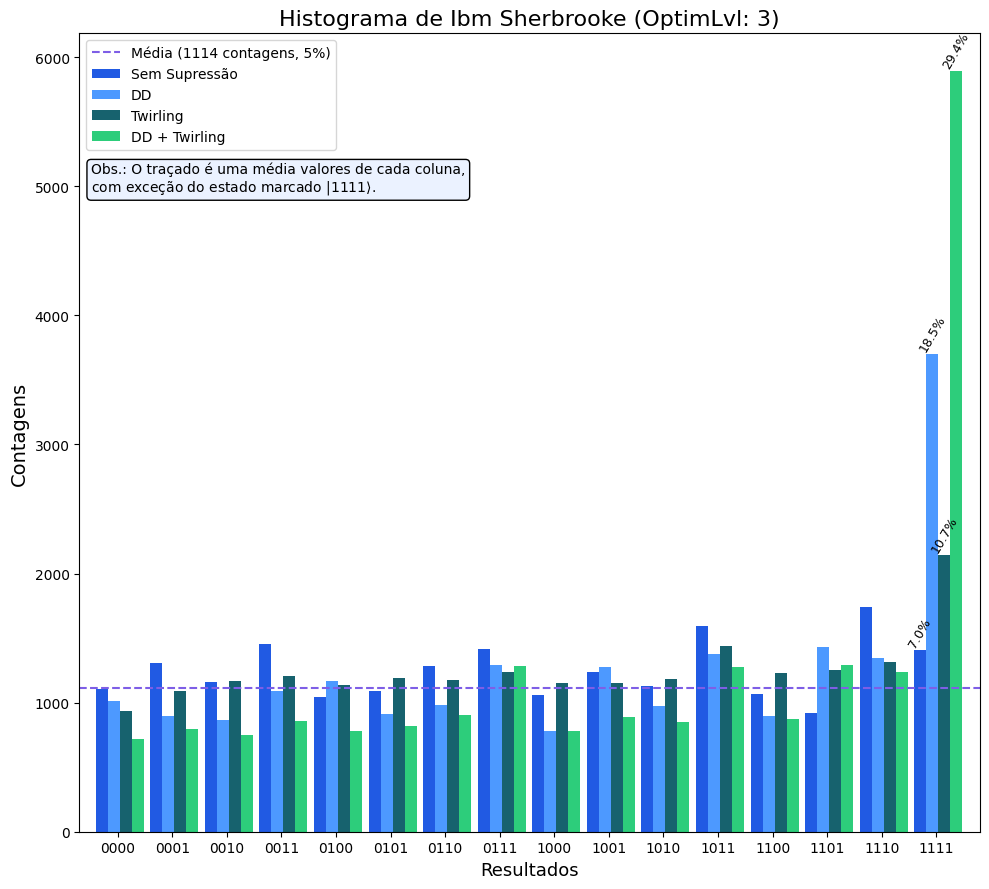

#### **Resultados ID de Sherbrooke com DD e Twi (02/05/25) Usando Pass Manager**

```
job_DD_Twiling_3 = service.job('d0adjp26rr3g0087brp0')
job_DD_Twiling_2 = service.job('d0adjn26rr3g0087brn0')
job_Twiling_3 = service.job('d0adj4rnhqag008pkzvg')
job_Twiling_2 = service.job('d0adj40kzhn0008vdfcg')
job_DD_3 = service.job('d09q8g2nhqag008pdxb0')
job_DD_2 = service.job('d0acngeqnmvg00875mf0')
job_none_3 = service.job('d0eyx85vpqf000841n5g')
job_none_2 = service.job('d0acne56rr3g0087bfq0')
```

Esses resultados  parece estarem com problema

**SEGUNDA TENTATIVA**


```
job_DD_Twiling_3 = service.job('d0fsdqpehmr0008g4w70')
job_DD_Twiling_2 = service.job('d0fsdqe8jzxg008mc0z0')
job_Twiling_3 = service.job('d0fsdcncrrag008bp8v0')
job_Twiling_2 = service.job('d0fsdc5crrag008bp8tg')
job_DD_3 = service.job('d0fsd14fbx30008vyqrg')
job_DD_2 = service.job('d0fsd0mcrrag008bp8m0')
job_none_3 = service.job('d0fscntehmr0008g4vyg')
job_none_2 = service.job('d0fscnaehmr0008g4vy0')
```

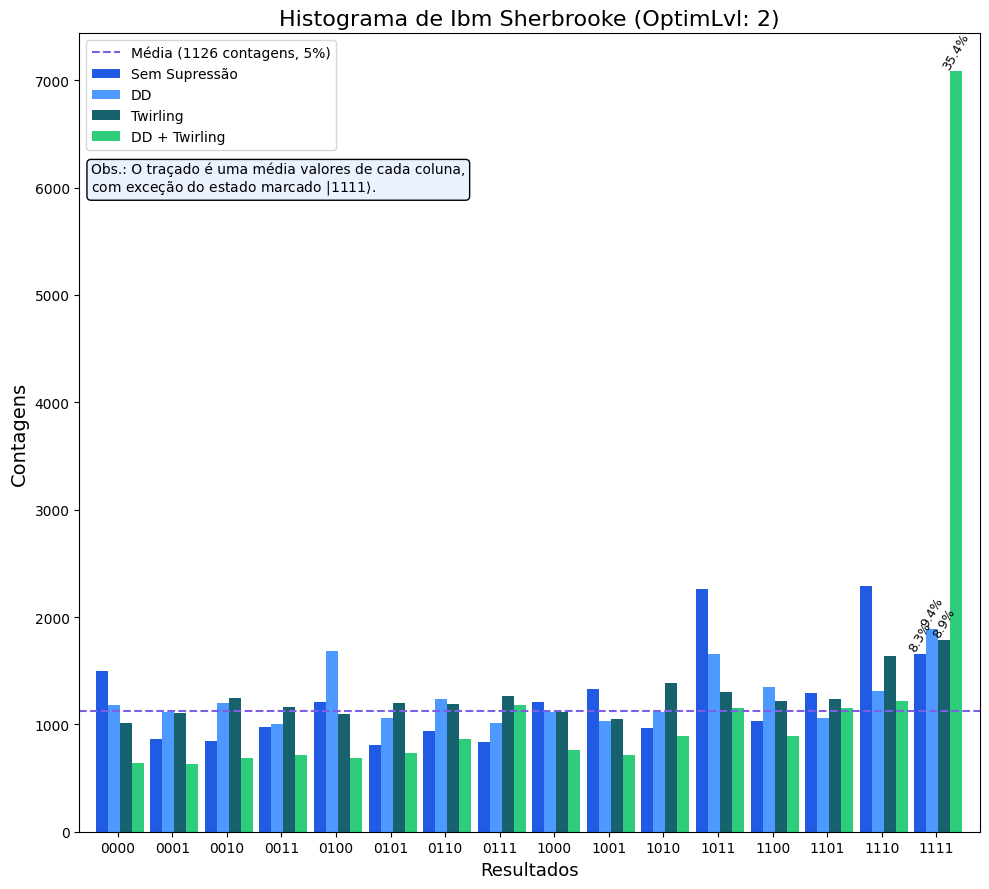

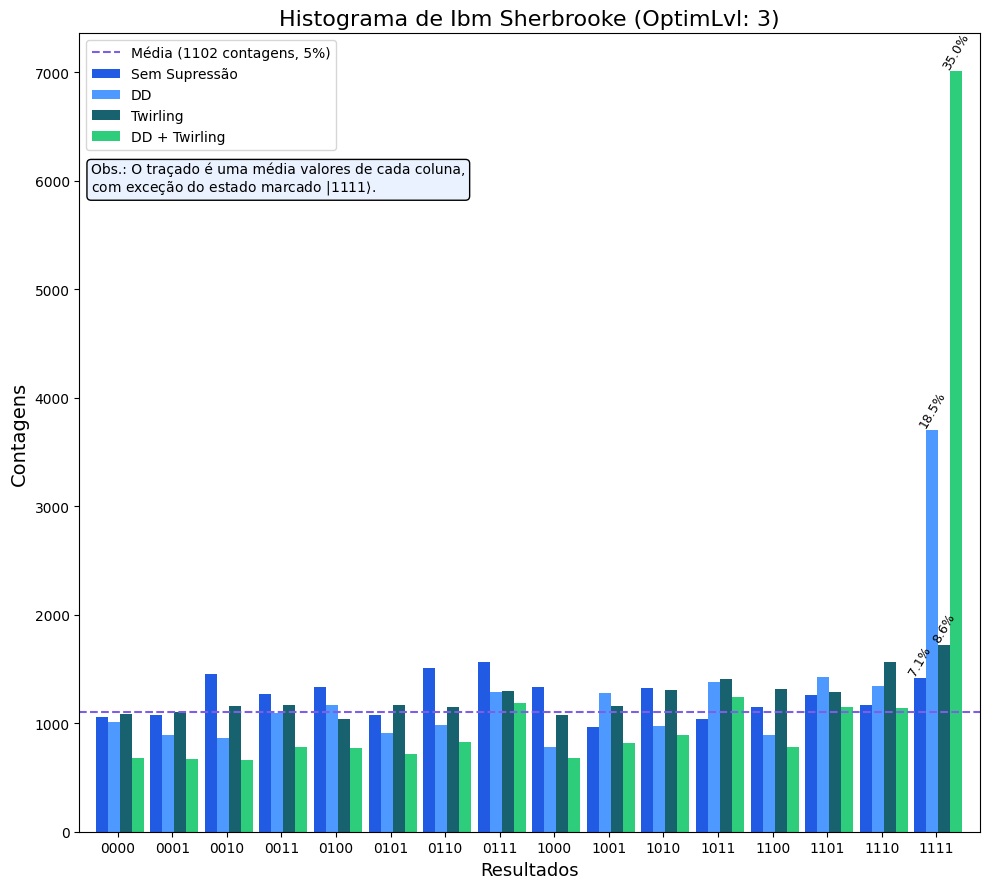

### **Resultados Brisbane**

#### **Resultados ID de Brisbane com DD e Twi (01/05/25) Usando Transpile**

```
job_none_2 = service.job('d0fsxge8jzxg008mc31g')
job_none_3 = service.job('d0fsxgyfbx30008vyt0g')
job_DD_2 = service.job('d0fsxvz36cs0008r6n50')
job_DD_3 = service.job('d0fsxwqehmr0008g4y5g')
job_Twiling_2 = service.job('d0fsy81vpqf0008470x0')
job_Twiling_3 = service.job('d0fsy8hcrrag008bpaw0')
job_DD_Twiling_2 = service.job('d0fsykj36cs0008r6ne0')
job_DD_Twiling_3 = service.job('d0fsym2vpqf000847110')
```



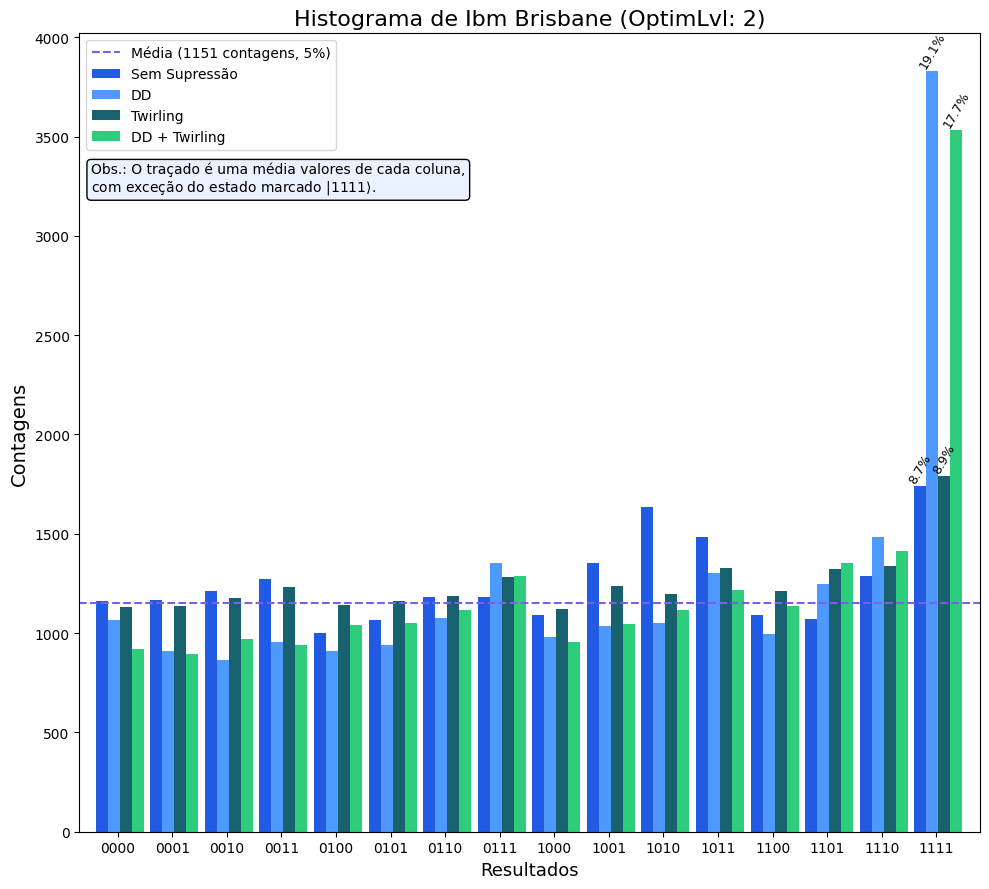

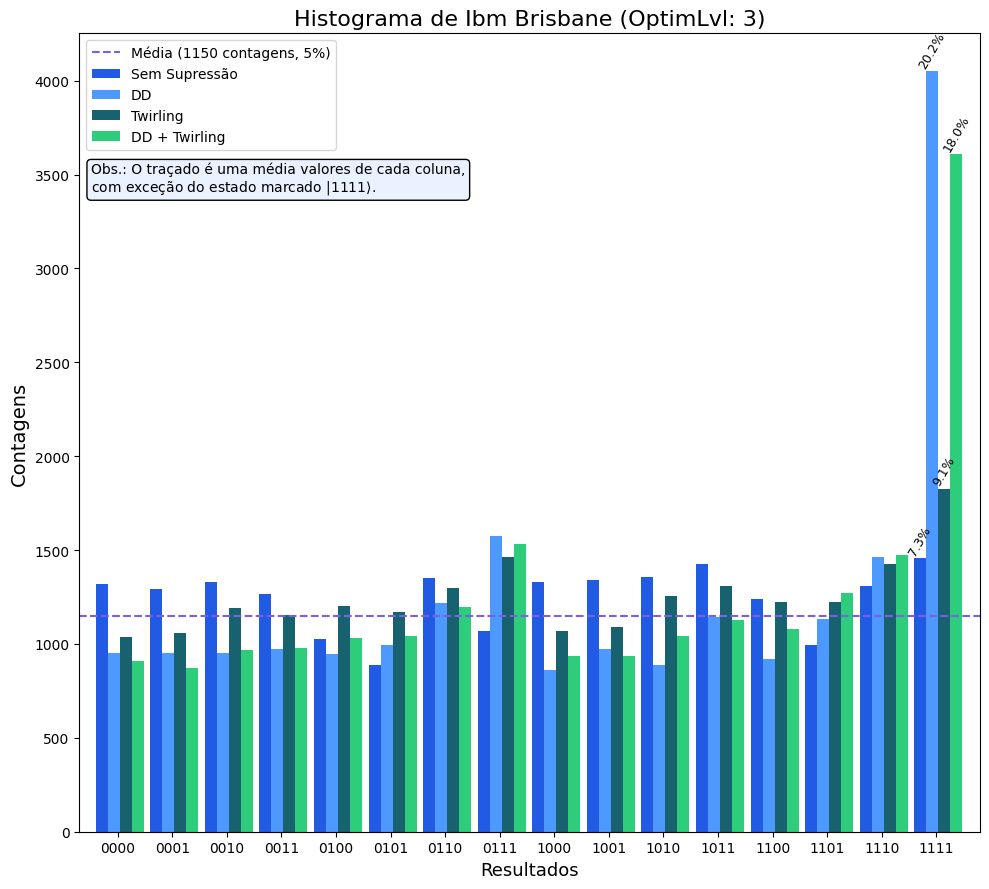

#### **Resultados ID de Brisbane com DD e Twi (01/05/25) Usando Pass Manager**

```
job_none_2 = service.job('d0ft71wvpqf0008472mg')
job_none_3 = service.job('d0ft72cvpqf0008472n0')
job_DD_2 = service.job('d0ft7anfbx30008vyvwg')
job_DD_3 = service.job('d0ft7b536cs0008r6q1g')
job_Twiling_2 = service.job('d0ft7ke8jzxg008mc4vg')
job_Twiling_3 = service.job('d0ft7kycrrag008bpcvg')
job_DD_Twiling_2 = service.job('d0ft7w7vpqf0008472x0')
job_DD_Twiling_3 = service.job('d0ft7wf8jzxg008mc4zg')
```

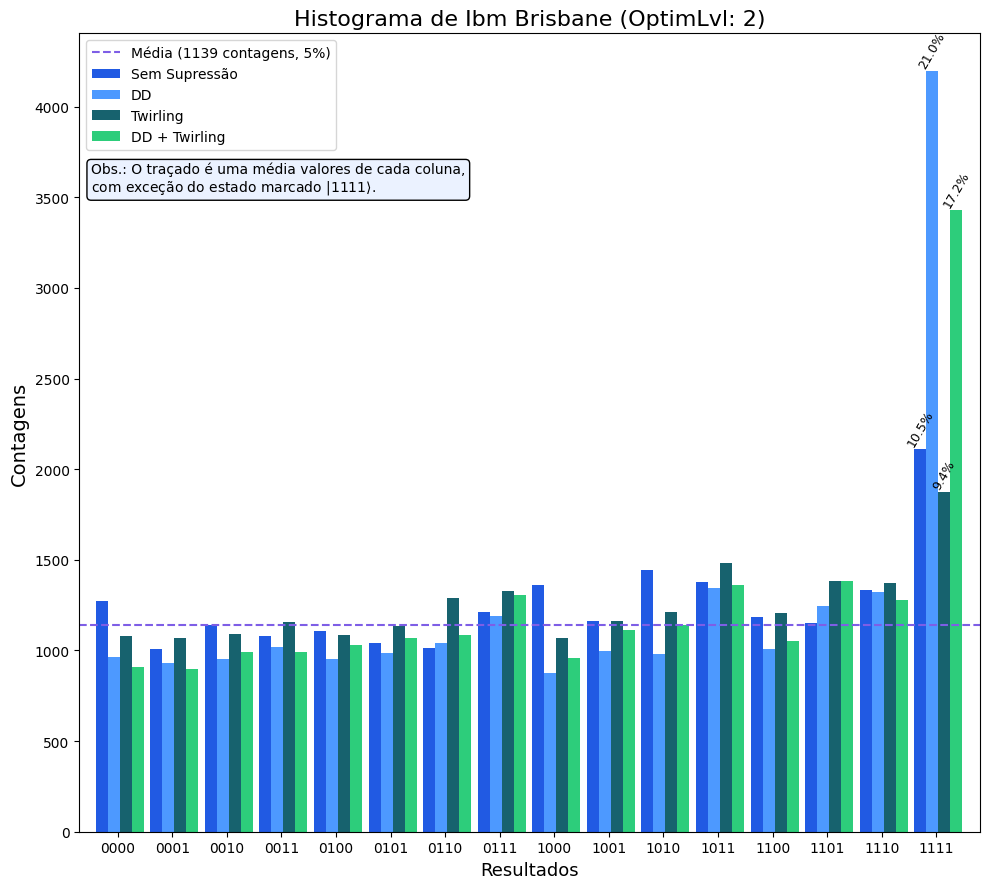

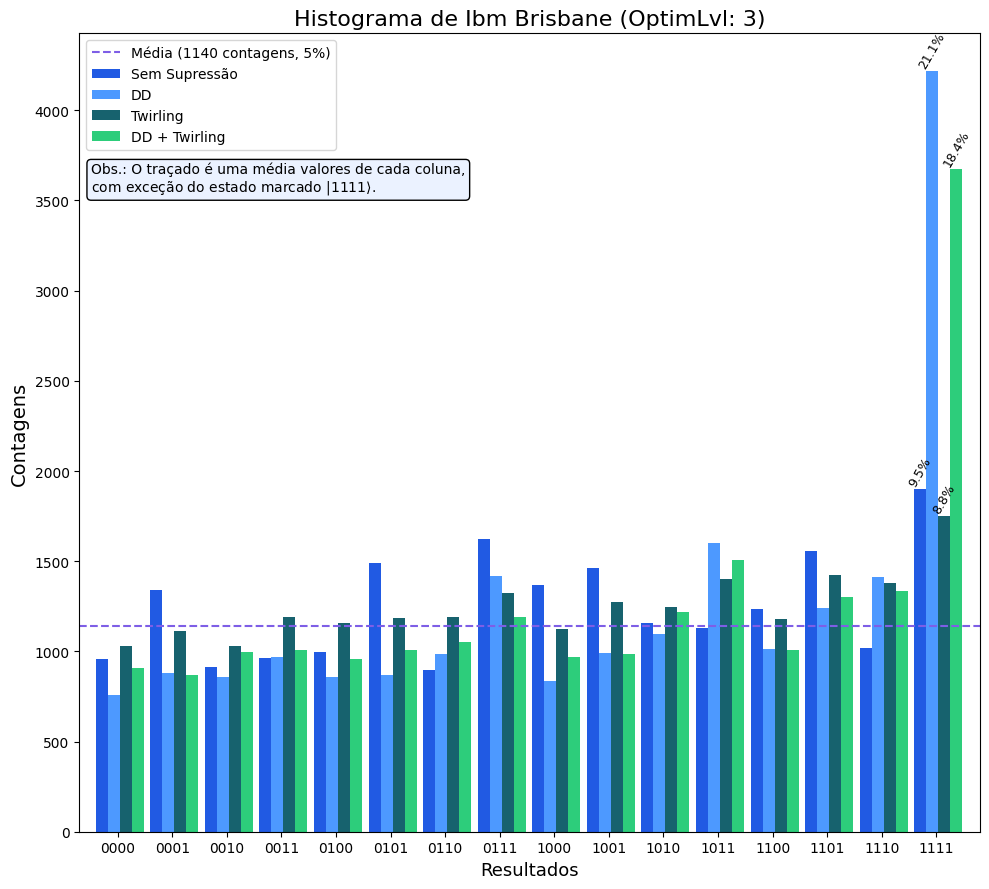